In [ ]:
#Run function created to run and prin shell command
# Run function taken from colab.research.google documentation for installation
def run (cmd):
  print('>> {}'.format(cmd))
  !{cmd}
  print('')
  # Install apache-beam
run('pip install apache-beam[interactive]')

>> pip install apache-beam[interactive]



In [ ]:
#Installing Pandas & Matplotlib
!pip install Pandas
!pip install matplotlib

In [ ]:
import apache_beam as beam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# dataframe(df)-> 2 dimensional data structure like
# a 2 dimensional array or a table with rows and columns
try:
  df=pd.read_csv('https://media.githubusercontent.com/media/christiane-villaroel/credit-card-fraud-detection/main/transactions.csv')
  print("File read successfully!\nYay!")
except pd.errors.ParserError as e:
  print(f'error reading file: {e}')
  with open('https://media.githubusercontent.com/media/christiane-villaroel/credit-card-fraud-detection/main/transactions.csv','r') as f:
    for line in f:
      print(line, end ='')

File read successfully!
Yay!


In [ ]:
# saving dataframe(df) to a csv file on colab
df.to_csv('transactions.csv',index=False)# pandas df creates a separate column for index numbers, we can avoid having this by setting index to false

In [ ]:
 # creating pipeline
pipeline = beam.Pipeline()

outputs = (
    pipeline
    | 'Read CSV' >> beam.io.ReadFromText('transactions.csv')
    | 'Write CSV' >> beam.io.WriteToText('transactions_output.txt')
    | 'Print Output'>> beam.Map(print)
)

In [ ]:
df.loc[df["step"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2703,1,CASH_IN,43478.09,C1156135967,7471989.62,7515467.71,C2117043942,124103.0,173135.98,0,0
2704,1,PAYMENT,4541.85,C1110913929,198.00,0.00,M162667475,0.0,0.00,0,0
2705,1,PAYMENT,525.89,C174245837,8496.61,7970.72,M124132186,0.0,0.00,0,0
2706,1,PAYMENT,353.62,C2083969860,7970.72,7617.10,M1707293586,0.0,0.00,0,0


In [ ]:
df_cp=df.copy()
fraud_counts = df.groupby(['type', 'isFraud']).size().reset_index(name='counts')
print(fraud_counts)


       type  isFraud   counts
0   CASH_IN        0  1399284
1  CASH_OUT        0  2233384
2  CASH_OUT        1     4116
3     DEBIT        0    41432
4   PAYMENT        0  2151495
5  TRANSFER        0   528812
6  TRANSFER        1     4097


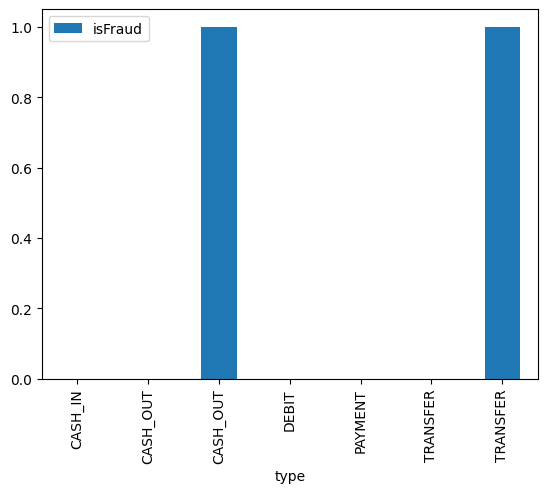

In [ ]:
fraud_counts.plot(kind='bar', x='type', y='isFraud')
plt.show()

In [ ]:
df_cp.head(3)



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [ ]:
# Run pipeline and runs outputs commands: Read, Write and Print output CSV
pipeline.run()

transactions_output.txt-00000-of-00001
